In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm

import matplotlib
from matplotlib import rc

rc("font", **{"family": "sans-serif", "sans-serif": "DejaVu Sans"})
rc("figure", **{"dpi": 200})
rc(
    "axes",
    **{"spines.right": False, "spines.top": False, "xmargin": 0.0, "ymargin": 0.05}
)
pd.set_option("display.max_rows", 200)


In [ ]:
df = pd.read_csv(
    '/content/drive/MyDrive/dataset/public/train.csv', low_memory=True)


In [ ]:
df_test = pd.read_csv(
    '/content/drive/MyDrive/dataset/public/test_feat.csv', low_memory=True)


In [ ]:
df.head()


index     fact_time  fact_latitude  fact_longitude  topography_bathymetry  \
0      0  1.538665e+09      42.696693       23.411436                  532.0   
1      1  1.539436e+09      51.447778        4.341944                   20.0   
2      2  1.541235e+09      39.175400      -76.668297                   42.0   
3      3  1.544501e+09      36.029598     -119.063004                  132.0   
4      4  1.538634e+09      34.398300      -96.148102                  179.0   

   sun_elevation  climate_temperature  climate_pressure  cmc_0_0_6_2  \
0      11.436109            15.718571        694.970318   279.984589   
1      26.956421            12.511429        759.973131   288.606445   
2     -45.928553            10.842857        759.321626   284.499634   
3     -25.871600            15.259286        754.582732   278.388733   
4     -61.020501            20.564286        744.448625   294.560196   

   cmc_0_0_7_1000  ...  cmc_0_1_66_0_next  cmc_0_1_67_0_grad  \
0          10.375  ...                0.0                0.0   
1           8.375  ...                0.0                0.0   
2           1.125  ...                0.0                0.0   
3           2.500  ...                0.0                0.0   
4           3.250  ...                0.0                0.0   

   cmc_0_1_67_0_next  cmc_0_1_68_0_grad  cmc_0_1_68_0_next  \
0                0.0                0.0                0.0   
1                0.0                0.0                0.0   
2                0.0                0.0                0.0   
3                0.0                0.0                0.0   
4                0.0                0.0                0.0   

   gfs_2m_dewpoint_grad  gfs_2m_dewpoint_next  \
0              0.058990              0.808984   
1              0.348022             16.150018   
2             -1.500000              5.950006   
3              0.299988              6.450006   
4             -0.500000             20.749994   

   gfs_total_clouds_cover_low_grad  gfs_total_clouds_cover_low_next  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                            100.0   
3                              0.0                              0.0   
4                              0.0                              0.0   

   fact_temperature  
0              19.0  
1              25.0  
2              11.0  
3               9.0  
4              23.0  

[5 rows x 113 columns]

# Data analysis





In [ ]:
tr_coordinates = df[['fact_latitude', 'fact_longitude']].drop_duplicates()
te_coordinates = df_test[['fact_latitude', 'fact_longitude']].drop_duplicates()


In [ ]:
merged = te_coordinates.merge(tr_coordinates, how='left', indicator=True)
tropic_coordinates = merged[merged['_merge'] == 'left_only']
common_coordinates = merged[merged['_merge'] == 'both']


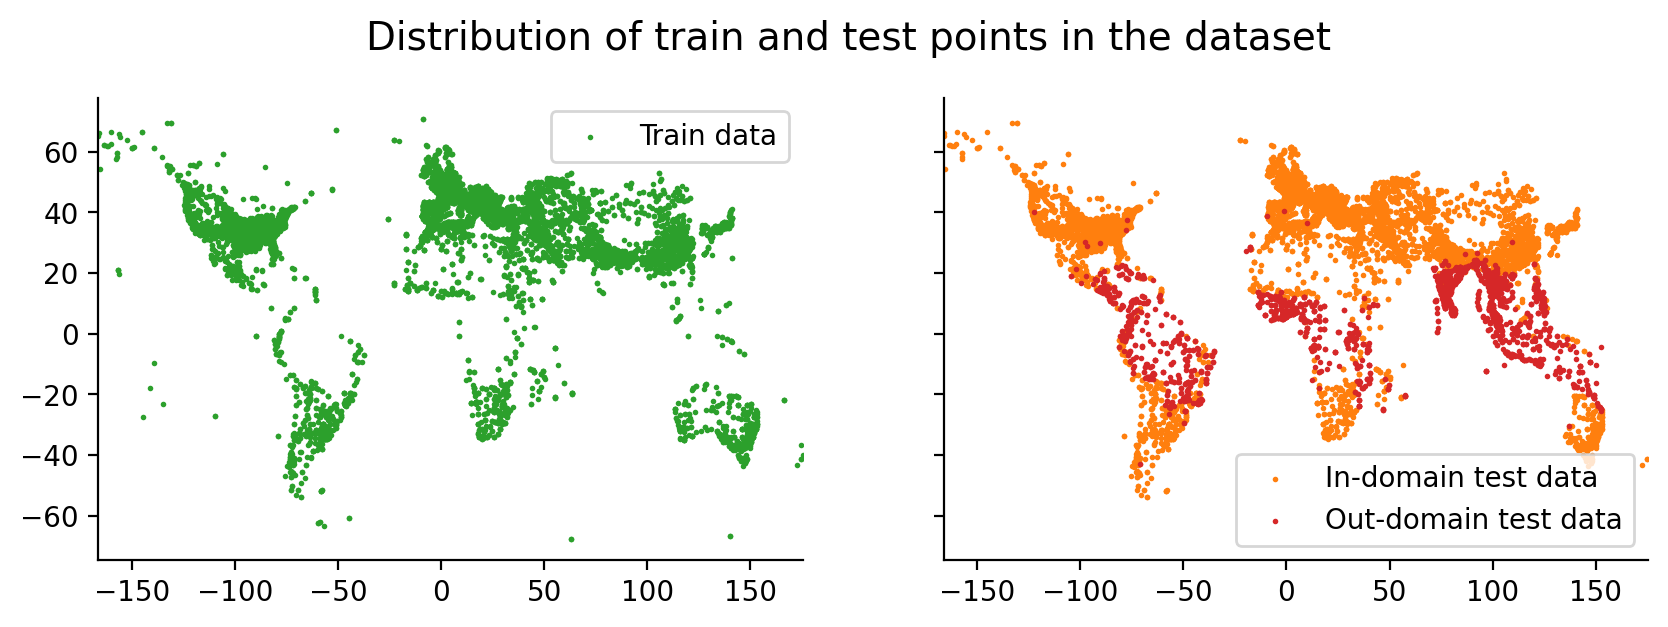

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[
    10, 3], dpi=200, sharex=True, sharey=True)
ax0.scatter(tr_coordinates['fact_longitude'], tr_coordinates['fact_latitude'],
            s=1, c='tab:green', label='Train data')
ax1.scatter(common_coordinates['fact_longitude'], common_coordinates['fact_latitude'],
            s=1, c='tab:orange', label='In-domain test data')
ax1.scatter(tropic_coordinates['fact_longitude'], tropic_coordinates['fact_latitude'],
            s=1, c='tab:red', label='Out-domain test data')
ax0.legend(), ax1.legend()
fig.suptitle('Distribution of train and test points in the dataset',
             y=1.01, fontsize=14)
plt.show()


\***\*Time VS Temeprature Analysis\*\***


In [ ]:
# Understanding the time format and converting it into days, months and years

print(df['fact_time'])
b = pd.to_datetime(df['fact_time'], unit='s')

b = b.to_frame()
targ = df['fact_temperature']
# mergedtime = b.merge(targ, how='left', indicator=True)
timetemp = []
timetemp = b.join(targ)


timetemp['Date'] = pd.to_datetime(timetemp['fact_time']).dt.date
timetemp['Time'] = pd.to_datetime(timetemp['fact_time']).dt.time
timetemp['Month'] = pd.to_datetime(timetemp['fact_time']).dt.month
timetemp['Weekday'] = pd.to_datetime(timetemp['fact_time']).dt.weekday


timetemp.insert(6, "Temp", timetemp['fact_temperature'])
timetemp.pop('fact_temperature')


print(timetemp)


0          1.538665e+09
1          1.539436e+09
2          1.541235e+09
3          1.544501e+09
4          1.538634e+09
               ...     
1993569    1.543543e+09
1993570    1.541552e+09
1993571    1.545372e+09
1993572    1.544355e+09
1993573    1.539140e+09
Name: fact_time, Length: 1993574, dtype: float64
                  fact_time        Date      Time  Month  Weekday  Temp
0       2018-10-04 15:00:00  2018-10-04  15:00:00     10        3  19.0
1       2018-10-13 13:00:00  2018-10-13  13:00:00     10        5  25.0
2       2018-11-03 08:54:00  2018-11-03  08:54:00     11        5  11.0
3       2018-12-11 03:56:00  2018-12-11  03:56:00     12        1   9.0
4       2018-10-04 06:15:00  2018-10-04  06:15:00     10        3  23.0
...                     ...         ...       ...    ...      ...   ...
1993569 2018-11-30 02:00:00  2018-11-30  02:00:00     11        4  -2.0
1993570 2018-11-07 00:56:00  2018-11-07  00:56:00     11        2  12.0
1993571 2018-12-21 06:08:00  2018-12-21

In [ ]:
# Number of months and years over which the data was collected

z = pd.to_datetime(timetemp['Date']).dt.year
print(z.unique())

print(timetemp['Month'].unique())


[2018 2019]
[10 11 12  9  2  1]


In [ ]:
day = timetemp.groupby('Weekday').Temp.agg(['mean'])
day_w = ['sun', 'mon', 'tue', 'wed', 'thurs', 'fri', 'sat']

# print(day['mean'])
# print(day_w)


ax1 = sns.barplot(day_w, day['mean'])
ax1.bar_label(ax1.containers[0])

ax1.set_xlabel("Day_of_week", fontsize=10)
ax1.set_ylabel("Mean temperature", fontsize=10)
ax1.set_title('Day_of_week Vs Mean Temperature Analysis')


TypeError: ignored

The mean teamperature over all the days is almost same. So we will now go to a more deeper analysis.


In [ ]:
monthm = timetemp.groupby('Month').Temp.agg(['mean'])

month = timetemp.Month.unique()

ax = sns.barplot(np.sort(month), monthm['mean'])
ax.bar_label(ax.containers[0])
ax.set_xlabel("Month", fontsize=10)
ax.set_ylabel("Average temperature", fontsize=10)
ax.set_title('Month Vs Mean Temperature Analysis')


TypeError: ignored

The months over whihc data was considered were Sepetember, October, November and December of 2018, and January and February of 2019. The average temeperature is high during the Sepetember and October months as they are almost summer. The temperature keeps on decerasing from November till January due to the winter days. The temeperature starts increasing from February again as it is begining of Spring.


   Month       mean   min   max
0      1   8.501936 -45.0  48.0
1      2  10.060478 -44.0  46.0
2      9  22.021420 -27.0  48.0
3     10  17.408614 -21.0  60.0
4     11  12.181947 -45.0  43.0
5     12   9.676265 -42.0  49.0


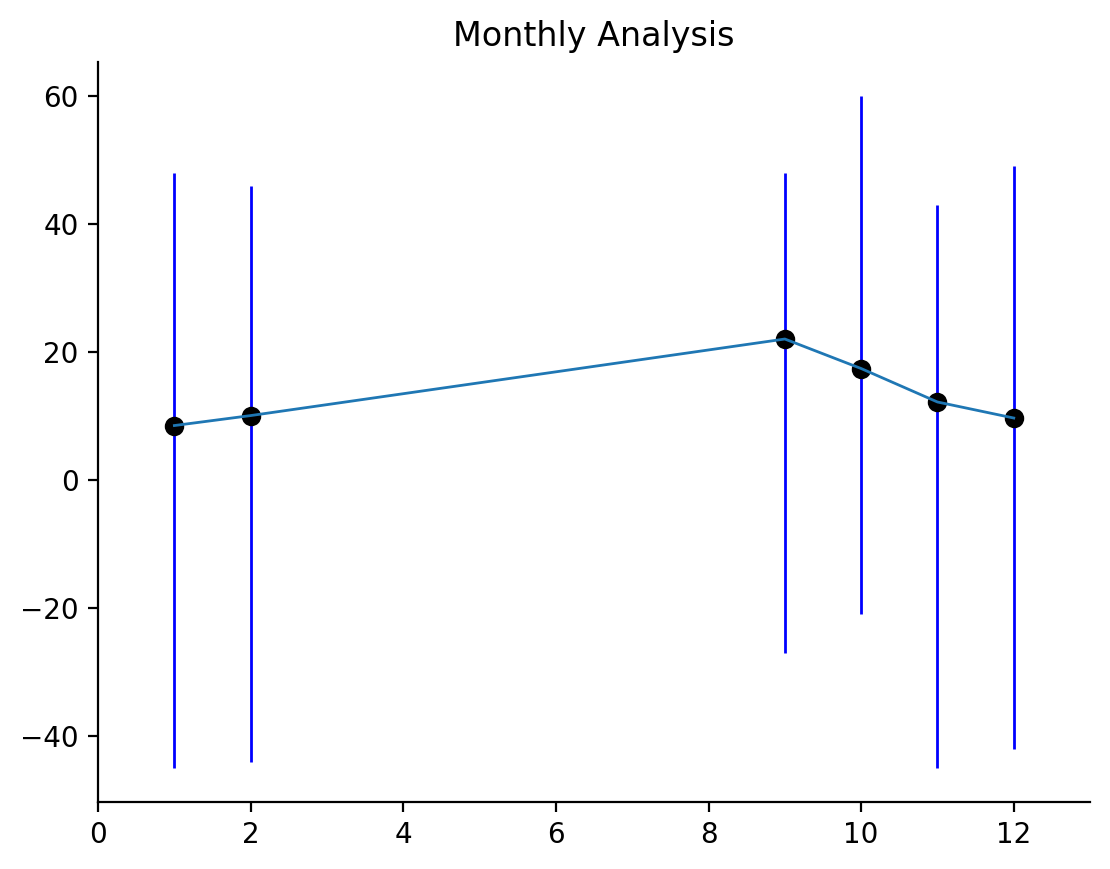

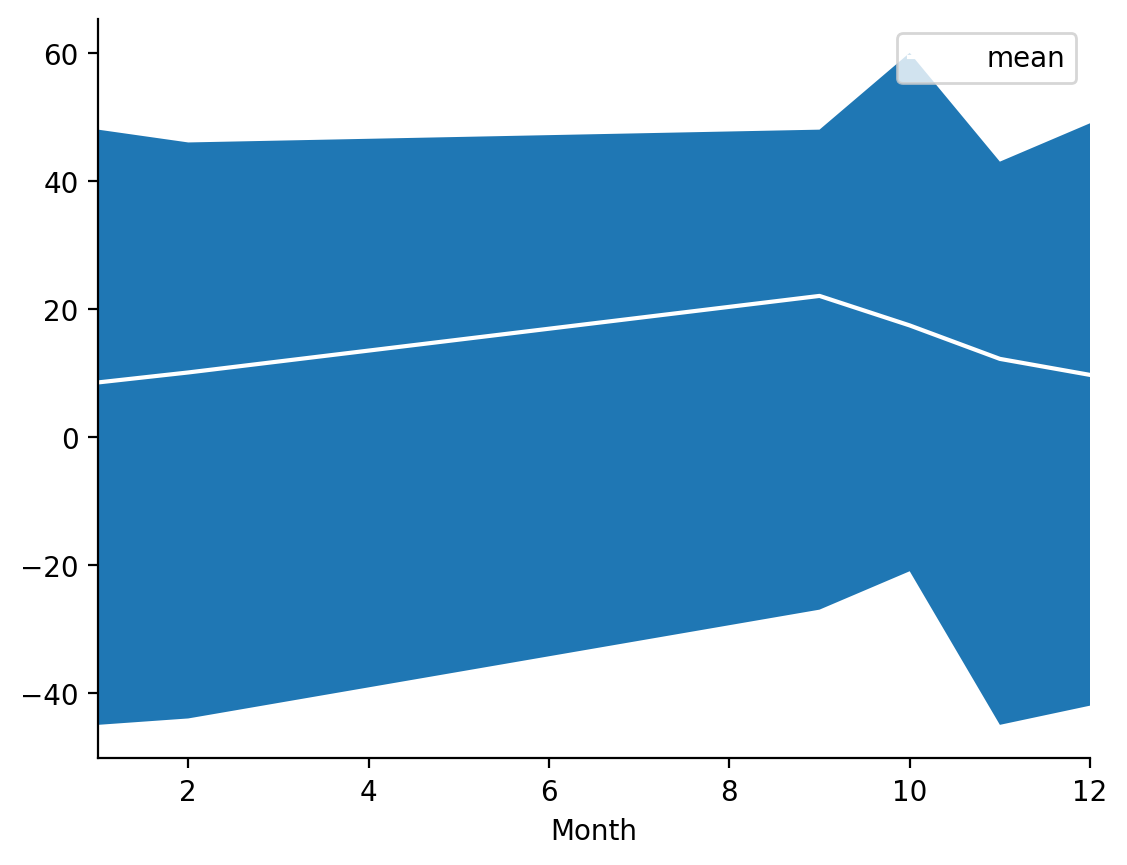

In [ ]:
data = timetemp.groupby('Month').Temp.agg(['mean', 'min', 'max'])
data.reset_index(inplace=True)
print(data)

months = data['Month']
means = data['mean']
mins = data['min']
maxs = data['max']


plt.errorbar(months, means, fmt='ok')
plt.errorbar(months, means, [means - mins, maxs - means],
             ecolor='blue', lw=1)
plt.xlim(0, 13)
plt.title('Monthly Analysis')

# ax1 = sns.boxplot(months,means)

ax = data.plot(x='Month', y='mean', c='white')
plt.fill_between(x='Month', y1='min', y2='max', data=data)


The minimum, maximum and the average temperature were plotted and the behaviour was as expected as shown in the plots.


(-50.0, 60.0)

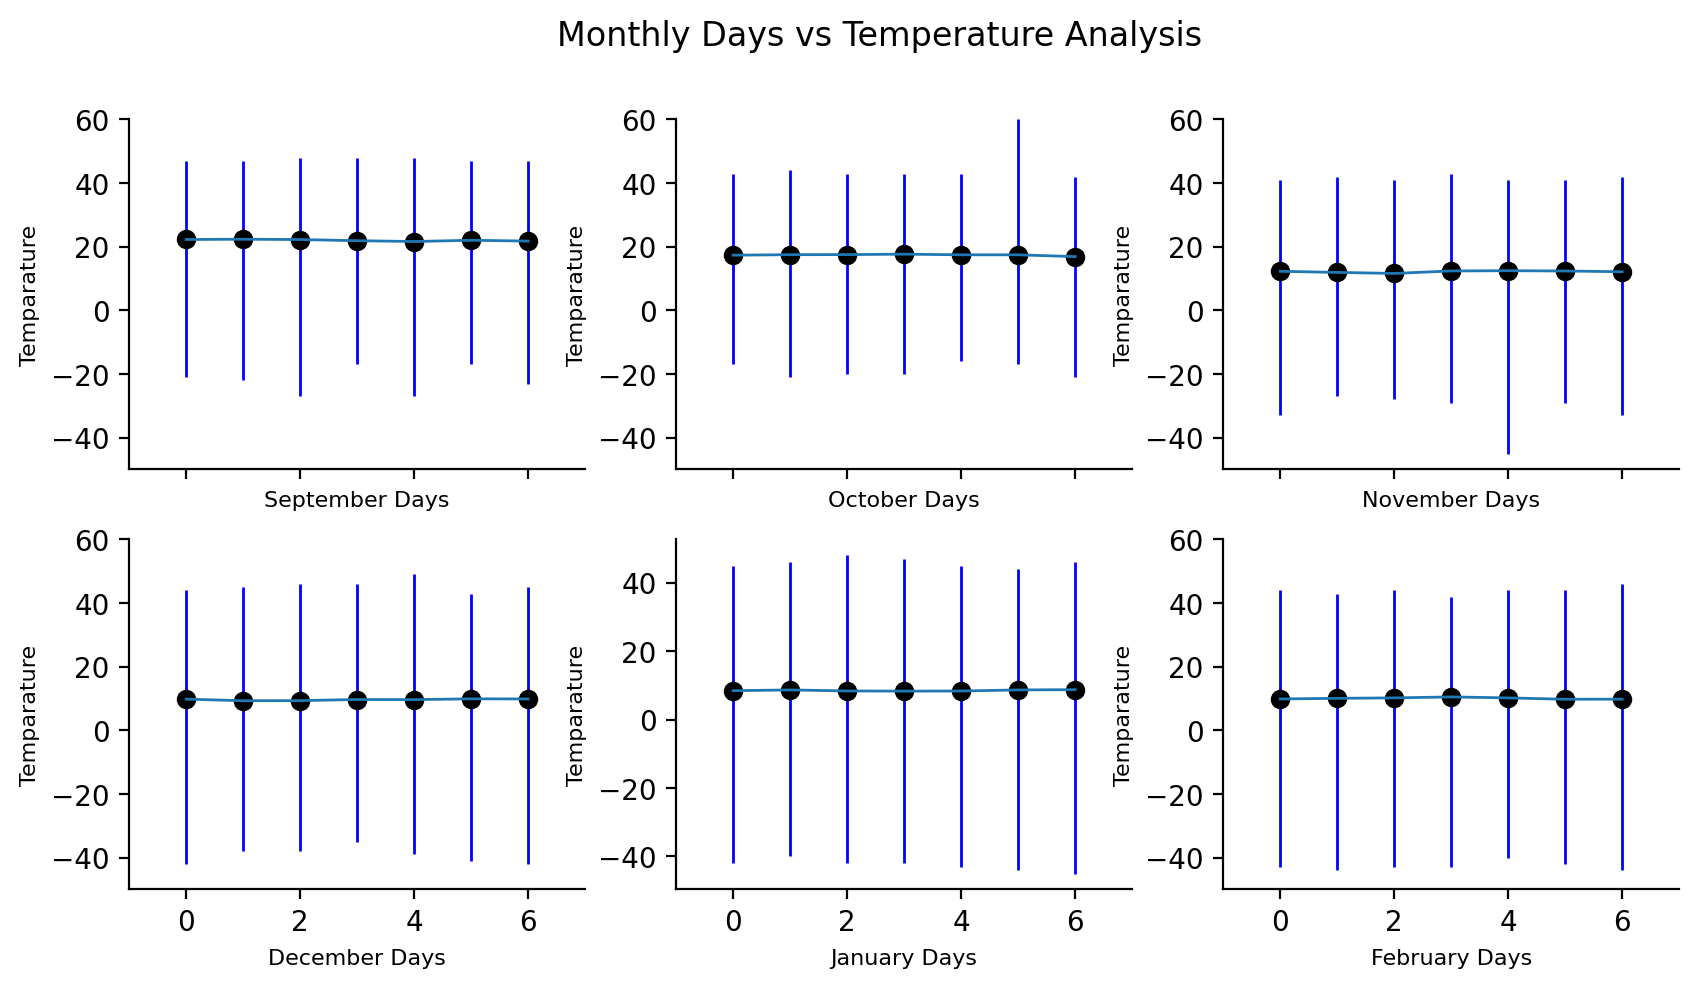

In [ ]:
# OCTOBER
octt = timetemp.loc[timetemp['Month'] == 10]
# df.loc[df['col1'] == value]

days = octt.groupby('Weekday').Temp.agg(['mean'])

data = octt.groupby('Weekday').Temp.agg(['mean', 'min', 'max'])
data.reset_index(inplace=True)
# print(data)

days = data['Weekday']
means = data['mean']
mins = data['min']
maxs = data['max']

fig, ax = plt.subplots(2, 3, sharex=True, figsize=(10, 5))

ax[0, 1].errorbar(days, means, fmt='ok')
ax[0, 1].errorbar(days, means, [means - mins, maxs - means],
                  ecolor='blue', lw=1)
ax[0, 1].set_xlabel("October Days", fontsize=8)
ax[0, 1].set_ylabel("Temparature", fontsize=8)
ax[0, 1].set_ylim([-50, 60])


plt.xlim(-1, 7)

fig.suptitle('Monthly Days vs Temperature Analysis')
# print(octt)

# SEPTEMBER
sept = timetemp.loc[timetemp['Month'] == 9]
# df.loc[df['col1'] == value]

days1 = sept.groupby('Weekday').Temp.agg(['mean'])

data1 = sept.groupby('Weekday').Temp.agg(['mean', 'min', 'max'])
data1.reset_index(inplace=True)
# print(data)

days1 = data1['Weekday']
means1 = data1['mean']
mins1 = data1['min']
maxs1 = data1['max']


ax[0, 0].errorbar(days1, means1, fmt='ok')
ax[0, 0].errorbar(days1, means1, [means1 - mins1, maxs1 - means1],
                  ecolor='blue', lw=1)
ax[0, 0].set_xlabel("September Days", fontsize=8)
ax[0, 0].set_ylabel("Temparature", fontsize=8)
ax[0, 0].set_ylim([-50, 60])


# print(data1)

# NOVEMBER
nov = timetemp.loc[timetemp['Month'] == 11]
# df.loc[df['col1'] == value]

days2 = nov.groupby('Weekday').Temp.agg(['mean'])

data2 = nov.groupby('Weekday').Temp.agg(['mean', 'min', 'max'])
data2.reset_index(inplace=True)
# print(data)

days2 = data2['Weekday']
means2 = data2['mean']
mins2 = data2['min']
maxs2 = data2['max']


ax[0, 2].errorbar(days2, means2, fmt='ok')
ax[0, 2].errorbar(days2, means2, [means2 - mins2, maxs2 - means2],
                  ecolor='blue', lw=1)
ax[0, 2].set_xlabel("November Days", fontsize=8)
ax[0, 2].set_ylabel("Temparature", fontsize=8)
ax[0, 2].set_ylim([-50, 60])


# DECEMBER
dec = timetemp.loc[timetemp['Month'] == 12]
# df.loc[df['col1'] == value]

days3 = dec.groupby('Weekday').Temp.agg(['mean'])

data3 = dec.groupby('Weekday').Temp.agg(['mean', 'min', 'max'])
data3.reset_index(inplace=True)
# print(data)

days3 = data3['Weekday']
means3 = data3['mean']
mins3 = data3['min']
maxs3 = data3['max']


ax[1, 0].errorbar(days3, means3, fmt='ok')
ax[1, 0].errorbar(days3, means3, [means3 - mins3, maxs3 - means3],
                  ecolor='blue', lw=1)
ax[1, 0].set_xlabel("December Days", fontsize=8)
ax[1, 0].set_ylabel("Temparature", fontsize=8)
ax[1, 0].set_ylim([-50, 60])


# JANUARY
jan = timetemp.loc[timetemp['Month'] == 1]
# df.loc[df['col1'] == value]

days4 = jan.groupby('Weekday').Temp.agg(['mean'])

data4 = jan.groupby('Weekday').Temp.agg(['mean', 'min', 'max'])
data4.reset_index(inplace=True)
# print(data)

days4 = data4['Weekday']
means4 = data4['mean']
mins4 = data4['min']
maxs4 = data4['max']


ax[1, 1].errorbar(days4, means4, fmt='ok')
ax[1, 1].errorbar(days4, means4, [means4 - mins4, maxs4 - means4],
                  ecolor='blue', lw=1)
ax[1, 1].set_xlabel("January Days", fontsize=8)
ax[1, 1].set_ylabel("Temparature", fontsize=8)
ax[1, 0].set_ylim([-50, 60])


# FEBRUARY
feb = timetemp.loc[timetemp['Month'] == 2]
# df.loc[df['col1'] == value]

days5 = feb.groupby('Weekday').Temp.agg(['mean'])

data5 = feb.groupby('Weekday').Temp.agg(['mean', 'min', 'max'])
data5.reset_index(inplace=True)
# print(data)

days5 = data5['Weekday']
means5 = data5['mean']
mins5 = data5['min']
maxs5 = data5['max']


ax[1, 2].errorbar(days5, means5, fmt='ok')
ax[1, 2].errorbar(days5, means5, [means5 - mins5, maxs5 - means5],
                  ecolor='blue', lw=1)
ax[1, 2].set_xlabel("February Days", fontsize=8)
ax[1, 2].set_ylabel("Temparature", fontsize=8)
ax[1, 2].set_ylim([-50, 60])


The temperature of all the days over all the months were plotted as the information was not clear about the day of the week and temeperature. During the weekends, the temeperature was at its extremeties (highest during the summer and low during the winter months). The rest of the days almost showed similar behaviour as with the other days during that particular month.


**Statical Information about the dataset**


In [ ]:
df.describe()


index     fact_time  fact_latitude  fact_longitude  \
count  1.993574e+06  1.993574e+06   1.993574e+06    1.993574e+06   
mean   9.967865e+05  1.543582e+09   3.115462e+01   -2.703852e+01   
std    5.754954e+05  4.515794e+06   2.088655e+01    7.436018e+01   
min    0.000000e+00  1.535760e+09  -6.760167e+01   -1.663390e+02   
25%    4.983932e+05  1.539669e+09   3.006920e+01   -9.114960e+01   
50%    9.967865e+05  1.543582e+09   3.566000e+01   -1.721460e+01   
75%    1.495180e+06  1.547491e+09   4.153240e+01    2.461920e+01   
max    1.993573e+06  1.551395e+09   7.093306e+01    1.753880e+02   

       topography_bathymetry  sun_elevation  climate_temperature  \
count           1.993574e+06   1.993574e+06         1.993574e+06   
mean            3.285789e+02  -5.860210e+00         1.351736e+01   
std             5.194110e+02   3.672498e+01         8.723483e+00   
min            -2.126000e+03  -8.989978e+01        -2.721357e+01   
25%             2.300000e+01  -3.667559e+01         7.025714e+00   
50%             1.160000e+02  -2.911450e+00         1.320000e+01   
75%             3.910000e+02   2.422460e+01         2.000857e+01   
max             4.659000e+03   8.986517e+01         4.599286e+01   

       climate_pressure   cmc_0_0_6_2  cmc_0_0_7_1000  ...  cmc_0_1_66_0_next  \
count      1.993574e+06  1.991773e+06    1.991773e+06  ...       1.991773e+06   
mean       7.302612e+02  2.797381e+02    7.695832e+00  ...       3.325517e-01   
std        4.484426e+01  9.535258e+00    5.933824e+00  ...       1.995224e+00   
min        4.072077e+02  2.249846e+02    0.000000e+00  ...       0.000000e+00   
25%        7.225525e+02  2.735037e+02    3.250000e+00  ...       0.000000e+00   
50%        7.482880e+02  2.798528e+02    6.375000e+00  ...       0.000000e+00   
75%        7.584323e+02  2.866298e+02    1.050000e+01  ...       0.000000e+00   
max        8.051014e+02  3.028238e+02    3.062500e+01  ...       1.151527e+02   

       cmc_0_1_67_0_grad  cmc_0_1_67_0_next  cmc_0_1_68_0_grad  \
count       1.991773e+06       1.991773e+06       1.991773e+06   
mean        2.381313e-03       3.807693e-02       7.312622e-04   
std         7.590582e-02       4.962380e-01       4.491461e-02   
min        -5.000000e-06       0.000000e+00      -5.000000e-06   
25%         0.000000e+00       0.000000e+00       0.000000e+00   
50%         0.000000e+00       0.000000e+00       0.000000e+00   
75%         0.000000e+00       0.000000e+00       0.000000e+00   
max         1.585967e+01       3.725895e+01       1.298353e+01   

       cmc_0_1_68_0_next  gfs_2m_dewpoint_grad  gfs_2m_dewpoint_next  \
count       1.991773e+06          1.993574e+06          1.993574e+06   
mean        1.097395e-02          6.764290e-03          6.311309e+00   
std         2.661001e-01          1.509631e+00          9.470227e+00   
min         0.000000e+00         -3.999998e+01         -6.865307e+01   
25%         0.000000e+00         -6.218262e-01         -4.999390e-02   
50%         0.000000e+00          0.000000e+00          6.150018e+00   
75%         0.000000e+00          6.787109e-01          1.315002e+01   
max         3.961083e+01          5.190001e+01          2.924999e+01   

       gfs_total_clouds_cover_low_grad  gfs_total_clouds_cover_low_next  \
count                     1.993574e+06                     1.993574e+06   
mean                      1.549980e-03                     1.965856e+01   
std                       1.797734e+01                     3.335334e+01   
min                      -1.000000e+02                     0.000000e+00   
25%                       0.000000e+00                     0.000000e+00   
50%                       0.000000e+00                     0.000000e+00   
75%                       0.000000e+00                     2.700000e+01   
max                       1.000000e+02                     1.000000e+02   

       fact_temperature  
count      1.993574e+06  
mean       1.331723e+01  
std        1.000971e+01  
min       -4.500000e+01  
25%     

In [ ]:
# Checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993574 entries, 0 to 1993573
Columns: 113 entries, index to fact_temperature
dtypes: float64(112), int64(1)
memory usage: 1.7 GB


**Missing Data per column**


In [ ]:
df_missing = df.isna().sum()
df_missing

index                                   0
fact_time                               0
fact_latitude                           0
fact_longitude                          0
topography_bathymetry                   0
sun_elevation                           0
climate_temperature                     0
climate_pressure                        0
cmc_0_0_6_2                          1801
cmc_0_0_7_1000                       1801
cmc_0_0_7_2                          1801
cmc_0_0_7_500                        1801
cmc_0_0_7_700                        1801
cmc_0_0_7_850                        1801
cmc_0_0_7_925                        1801
cmc_0_1_0_0                          1801
cmc_0_1_11_0                         1801
cmc_0_1_65_0                         1801
cmc_0_1_66_0                         1801
cmc_0_1_67_0                         1801
cmc_0_1_68_0                         1801
cmc_0_1_7_0                          1801
cmc_0_2_2_10                         1801
cmc_0_2_2_1000                    

**SKEW Plot**


FileNotFoundError: ignored

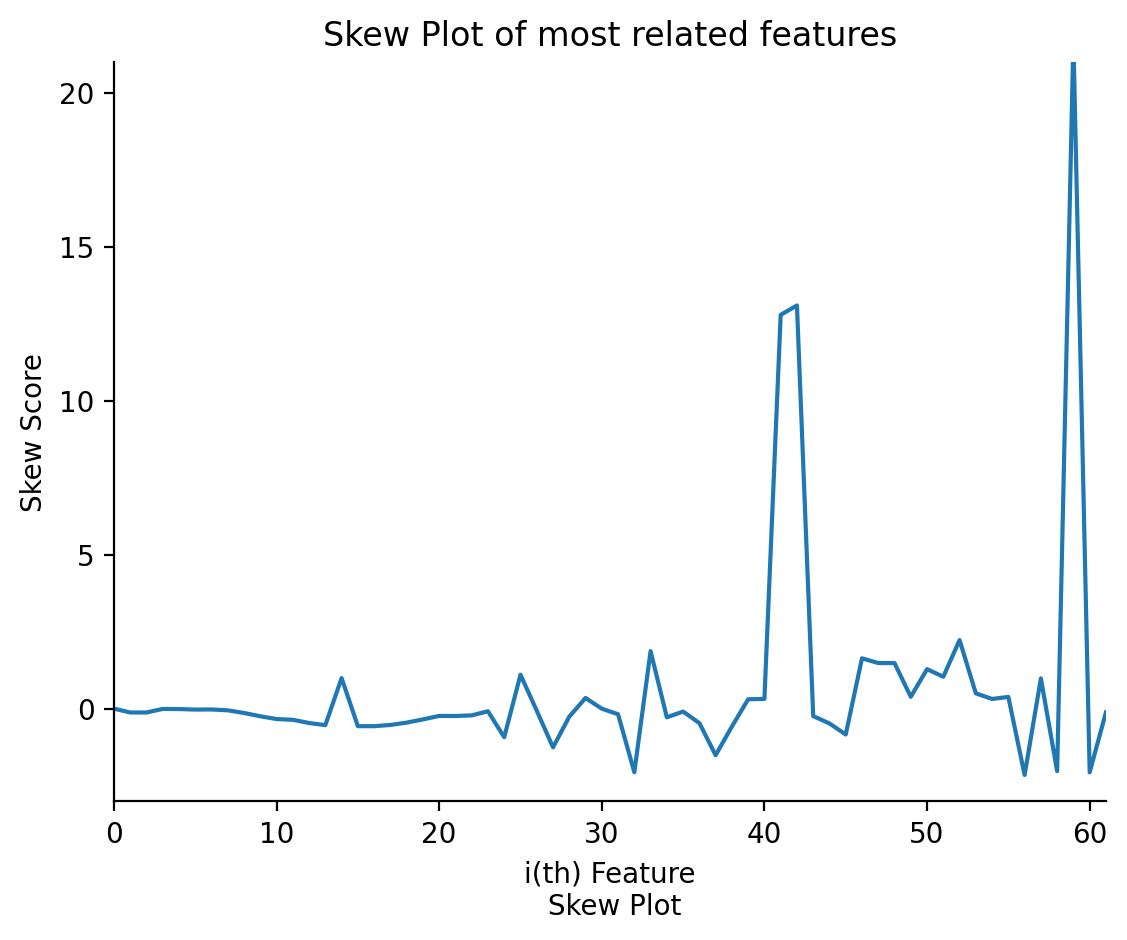

In [ ]:
from scipy import stats

# Extract training and testing data\\\

testcol60 = [
    'index',
    'wrf_t2_interpolated',
    'wrf_t2_next',
    'gfs_temperature_97500',
    'gfs_temperature_95000',
    'climate_temperature',
    'gfs_temperature_92500',
    'gfs_temperature_90000',
    'gfs_temperature_85000',
    'gfs_temperature_80000',
    'cmc_0_0_6_2',
    'gfs_temperature_75000',
    'gfs_temperature_70000',
    'gfs_temperature_65000',
    'cmc_0_1_0_0',
    'gfs_temperature_60000',
    'gfs_temperature_55000',
    'gfs_temperature_50000',
    'gfs_temperature_45000',
    'gfs_temperature_40000',
    'gfs_2m_dewpoint_next',
    'gfs_2m_dewpoint',
    'gfs_temperature_35000',
    'gfs_temperature_30000',
    'cmc_0_3_5_500',
    'gfs_precipitable_water',
    'gfs_temperature_25000',
    'cmc_0_3_5_700',
    'gfs_temperature_10000',
    'gfs_temperature_15000',
    'fact_time',
    'gfs_temperature_7000',
    'fact_latitude',
    'cmc_0_0_7_2',
    'cmc_0_3_1_0',
    'sun_elevation',
    'cmc_0_3_5_1000',
    'cmc_0_3_5_850',
    'gfs_humidity',
    'cmc_0_2_2_500',
    'cmc_0_2_2_700',
    'cmc_0_1_66_0_next',
    'cmc_0_1_66_0',
    'gfs_temperature_20000',
    'gfs_a_vorticity',
    'wrf_rh2',
    'gfs_total_clouds_cover_middle',
    'gfs_total_clouds_cover_low',
    'gfs_total_clouds_cover_low_next',
    'cmc_0_2_2_850',
    'cmc_0_0_7_1000',
    'gfs_cloudness',
    'topography_bathymetry',
    'fact_longitude',
    'cmc_0_2_2_925',
    'cmc_0_2_2_10',
    'climate_pressure',
    'gfs_r_velocity',
    'cmc_0_3_0_0',
    'cmc_0_1_66_0_grad',
    'gfs_pressure',
    'fact_temperature'
]


# Check skewness of 60 features
skew_val = list(df[testcol60].skew())


plt.plot(skew_val)
plt.ylim(-3, 21)
plt.title("Skew Plot of most related features")

# Add labels

plt.xlabel("i(th) Feature\n Skew Plot")
plt.ylabel("Skew Score")
#plt.savefig('skew_plot.png')
plt.show()


The overall dataset is very slightly skewed with a skew score of -0.077248, with individual columns going as high as 21.0. The skew scores are seen on the plot.


**Distribution**


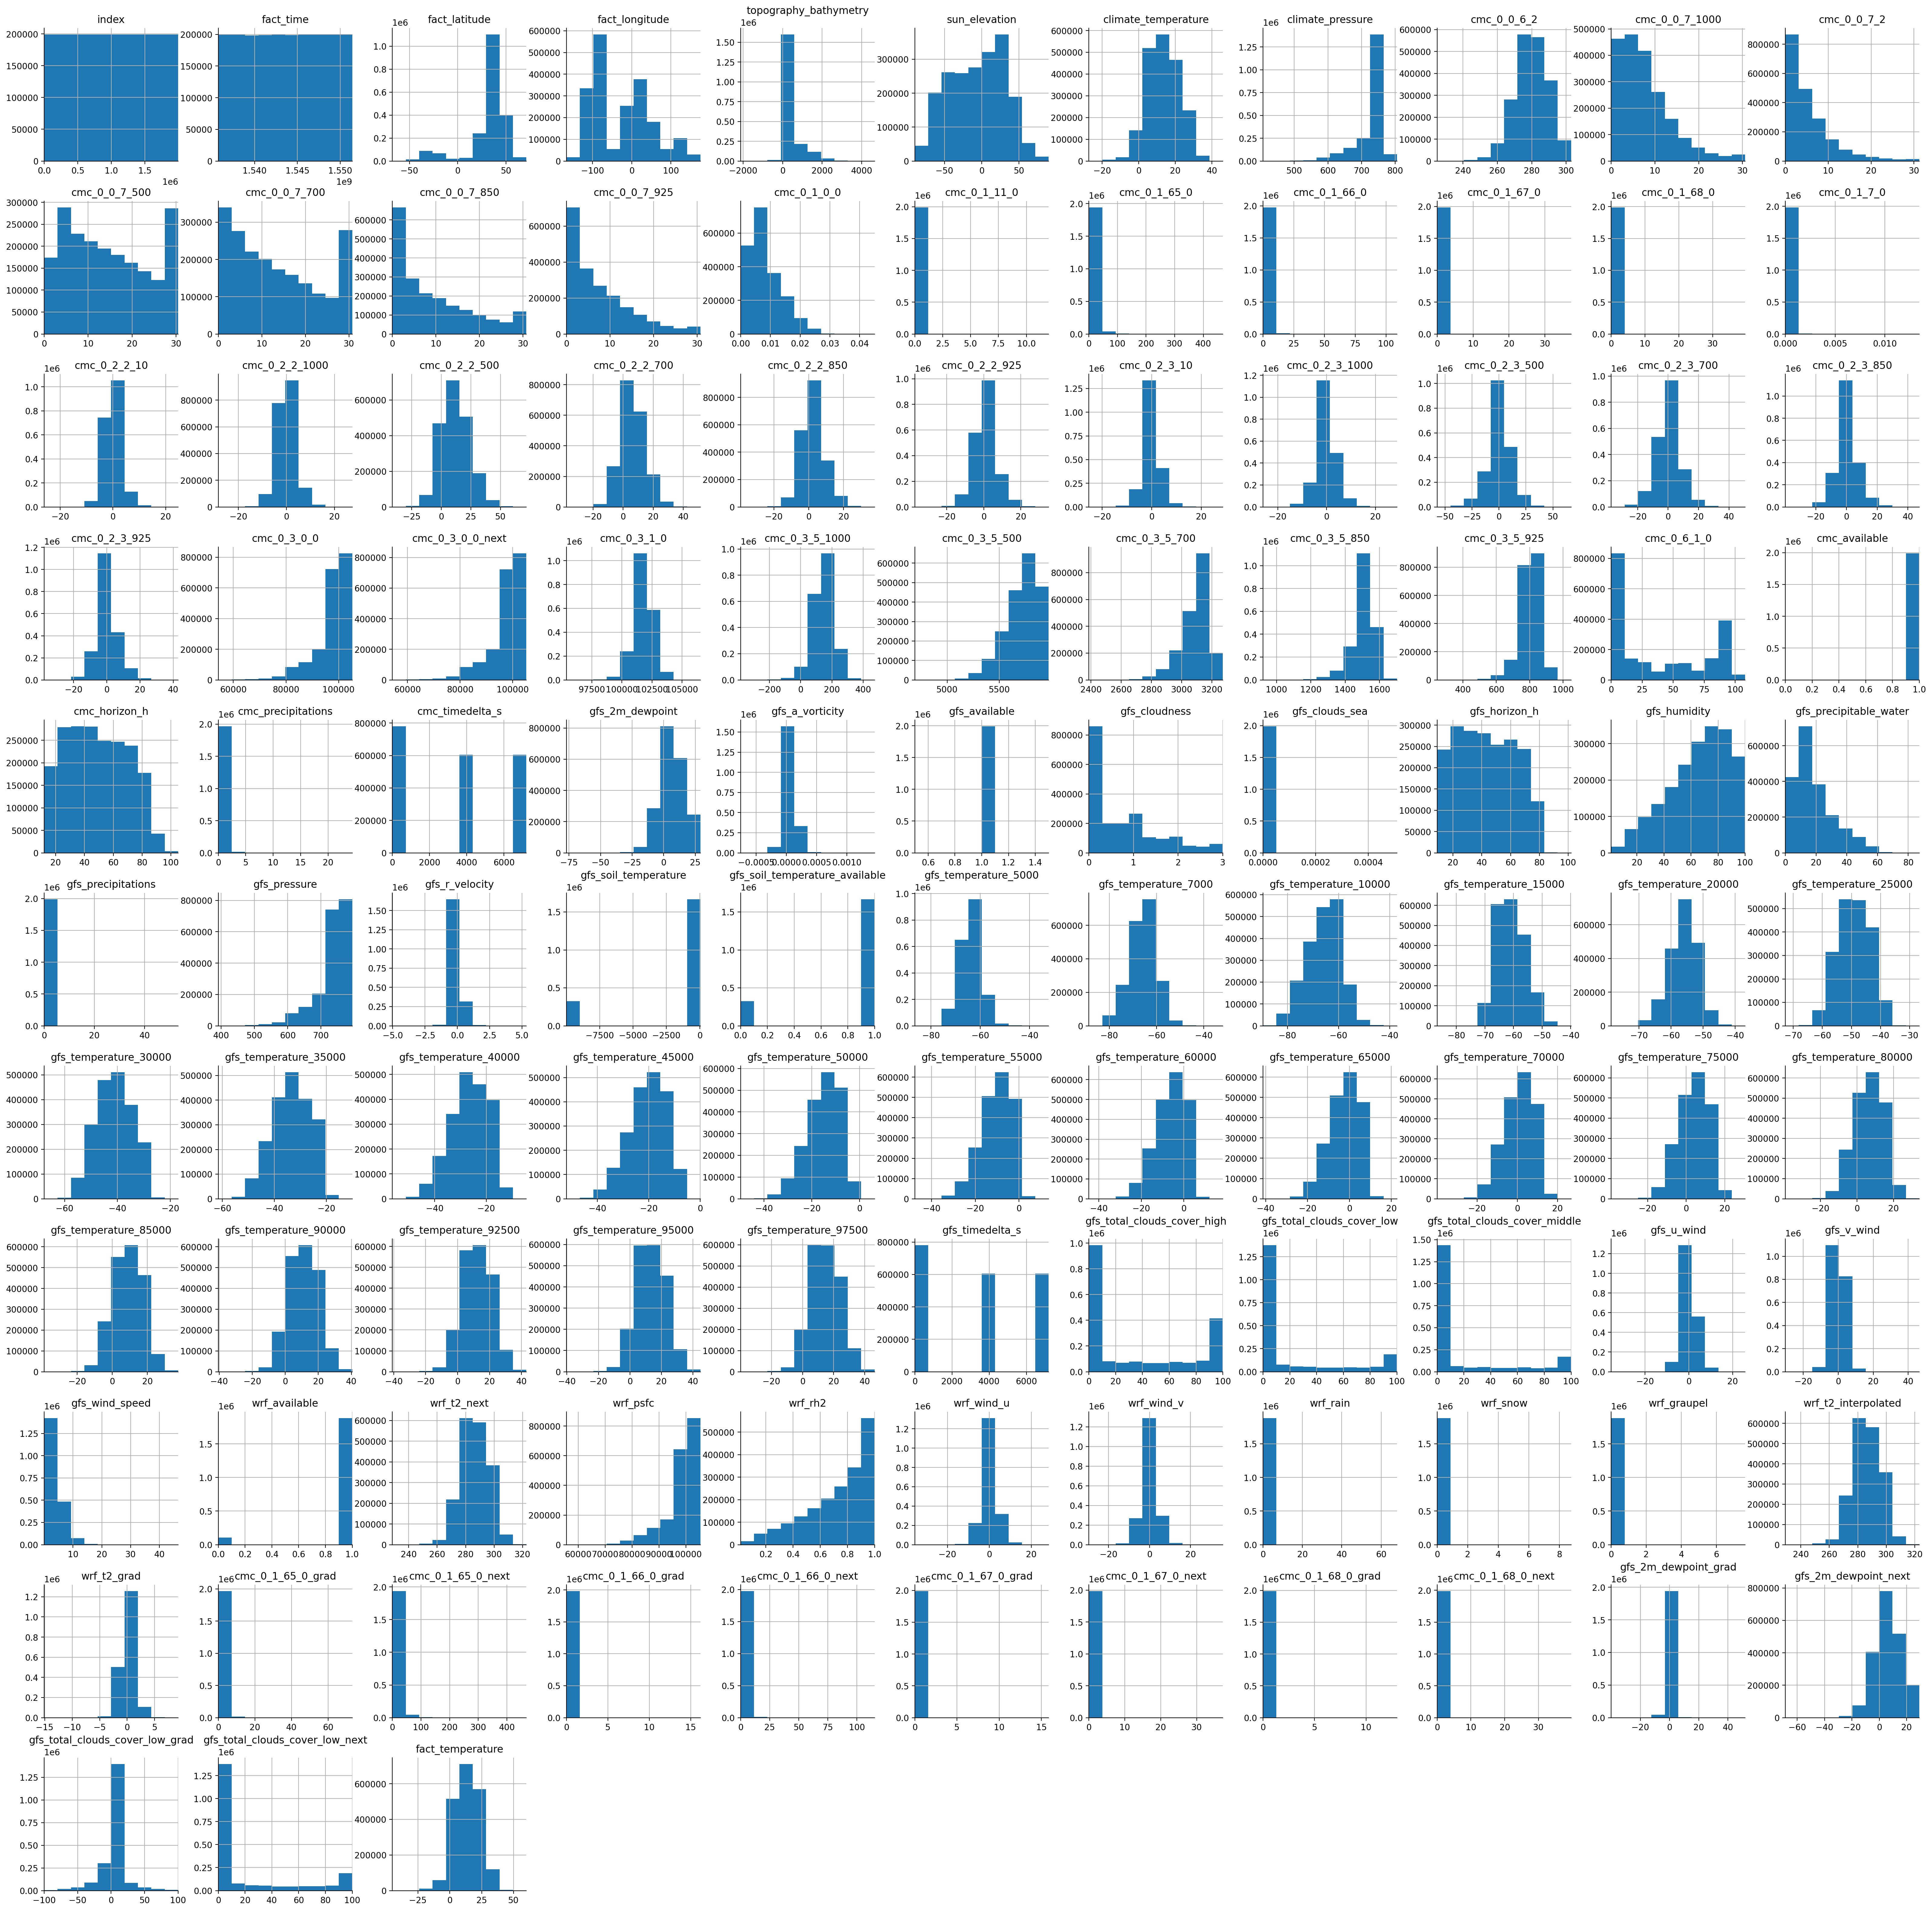

In [ ]:
df.hist(figsize=(40, 40))
plt.show()


The data distribution for all the features are checked for normal distribution using the Shapiro-Wilk  	 Test. Features that are deviating from the normal bell have a p-value of 0, while the others have 1.0.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


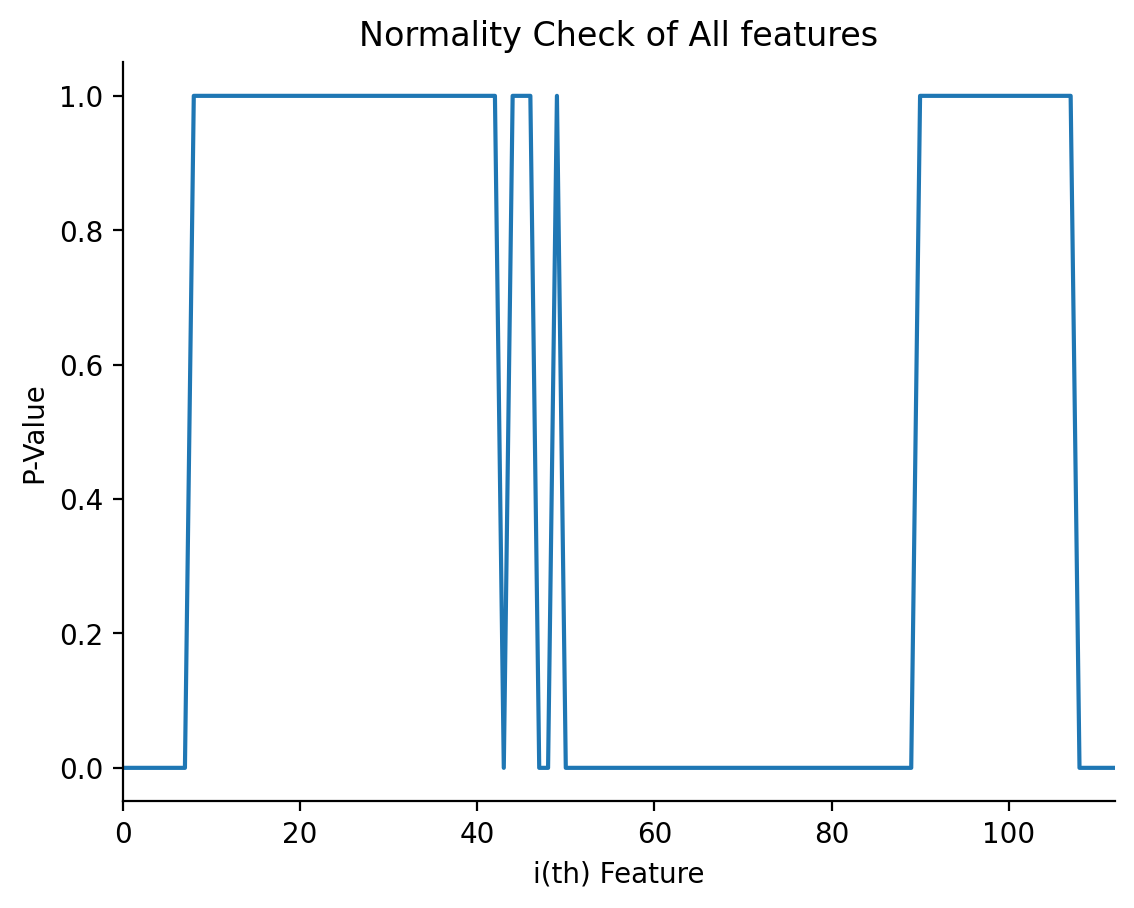

In [ ]:
from scipy.stats import shapiro

cols = df.columns
stat=[]
p=[]
for i in cols:
    stat_i, p_i = shapiro(df[i])
    stat.append(i)
    p.append(p_i)

plt.plot(p)
plt.title("Normality Check of All features")

# Add labels

plt.xlabel("i(th) Feature")
plt.ylabel("P-Value")
plt.show()

# Data Pre-processing

The previous step should give you a better understanding of which pre-processing is required for the data. This may include:

- Normalising and standardising the given data;
- Removing outliers;
- Carrying out feature selection, possibly using metrics derived from information theory;
- Handling missing information in the dataset;
- Augmenting the dataset with external information;
- Combining existing features.

Below is a very basic example of pre-processing steps.


**Handling Missing Information**

We resolve all the missing values by putting the mean.


In [ ]:
df.fillna(df.mean(), inplace=True)

# # REsolver all missing values by putting the mean value
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imp_mean.fit(df.iloc[:,1:-1])
# df = imp_mean.transform(df.iloc[:,1:-1])


In [ ]:
df.head()


index     fact_time  fact_latitude  fact_longitude  topography_bathymetry  \
0      0  1.538665e+09      42.696693       23.411436                  532.0   
1      1  1.539436e+09      51.447778        4.341944                   20.0   
2      2  1.541235e+09      39.175400      -76.668297                   42.0   
3      3  1.544501e+09      36.029598     -119.063004                  132.0   
4      4  1.538634e+09      34.398300      -96.148102                  179.0   

   sun_elevation  climate_temperature  climate_pressure  cmc_0_0_6_2  \
0      11.436109            15.718571        694.970318   279.984589   
1      26.956421            12.511429        759.973131   288.606445   
2     -45.928553            10.842857        759.321626   284.499634   
3     -25.871600            15.259286        754.582732   278.388733   
4     -61.020501            20.564286        744.448625   294.560196   

   cmc_0_0_7_1000  ...  cmc_0_1_66_0_next  cmc_0_1_67_0_grad  \
0          10.375  ...                0.0                0.0   
1           8.375  ...                0.0                0.0   
2           1.125  ...                0.0                0.0   
3           2.500  ...                0.0                0.0   
4           3.250  ...                0.0                0.0   

   cmc_0_1_67_0_next  cmc_0_1_68_0_grad  cmc_0_1_68_0_next  \
0                0.0                0.0                0.0   
1                0.0                0.0                0.0   
2                0.0                0.0                0.0   
3                0.0                0.0                0.0   
4                0.0                0.0                0.0   

   gfs_2m_dewpoint_grad  gfs_2m_dewpoint_next  \
0              0.058990              0.808984   
1              0.348022             16.150018   
2             -1.500000              5.950006   
3              0.299988              6.450006   
4             -0.500000             20.749994   

   gfs_total_clouds_cover_low_grad  gfs_total_clouds_cover_low_next  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                            100.0   
3                              0.0                              0.0   
4                              0.0                              0.0   

   fact_temperature  
0              19.0  
1              25.0  
2              11.0  
3               9.0  
4              23.0  

[5 rows x 113 columns]

# **Feature Selection**


**Correlation Matrix**


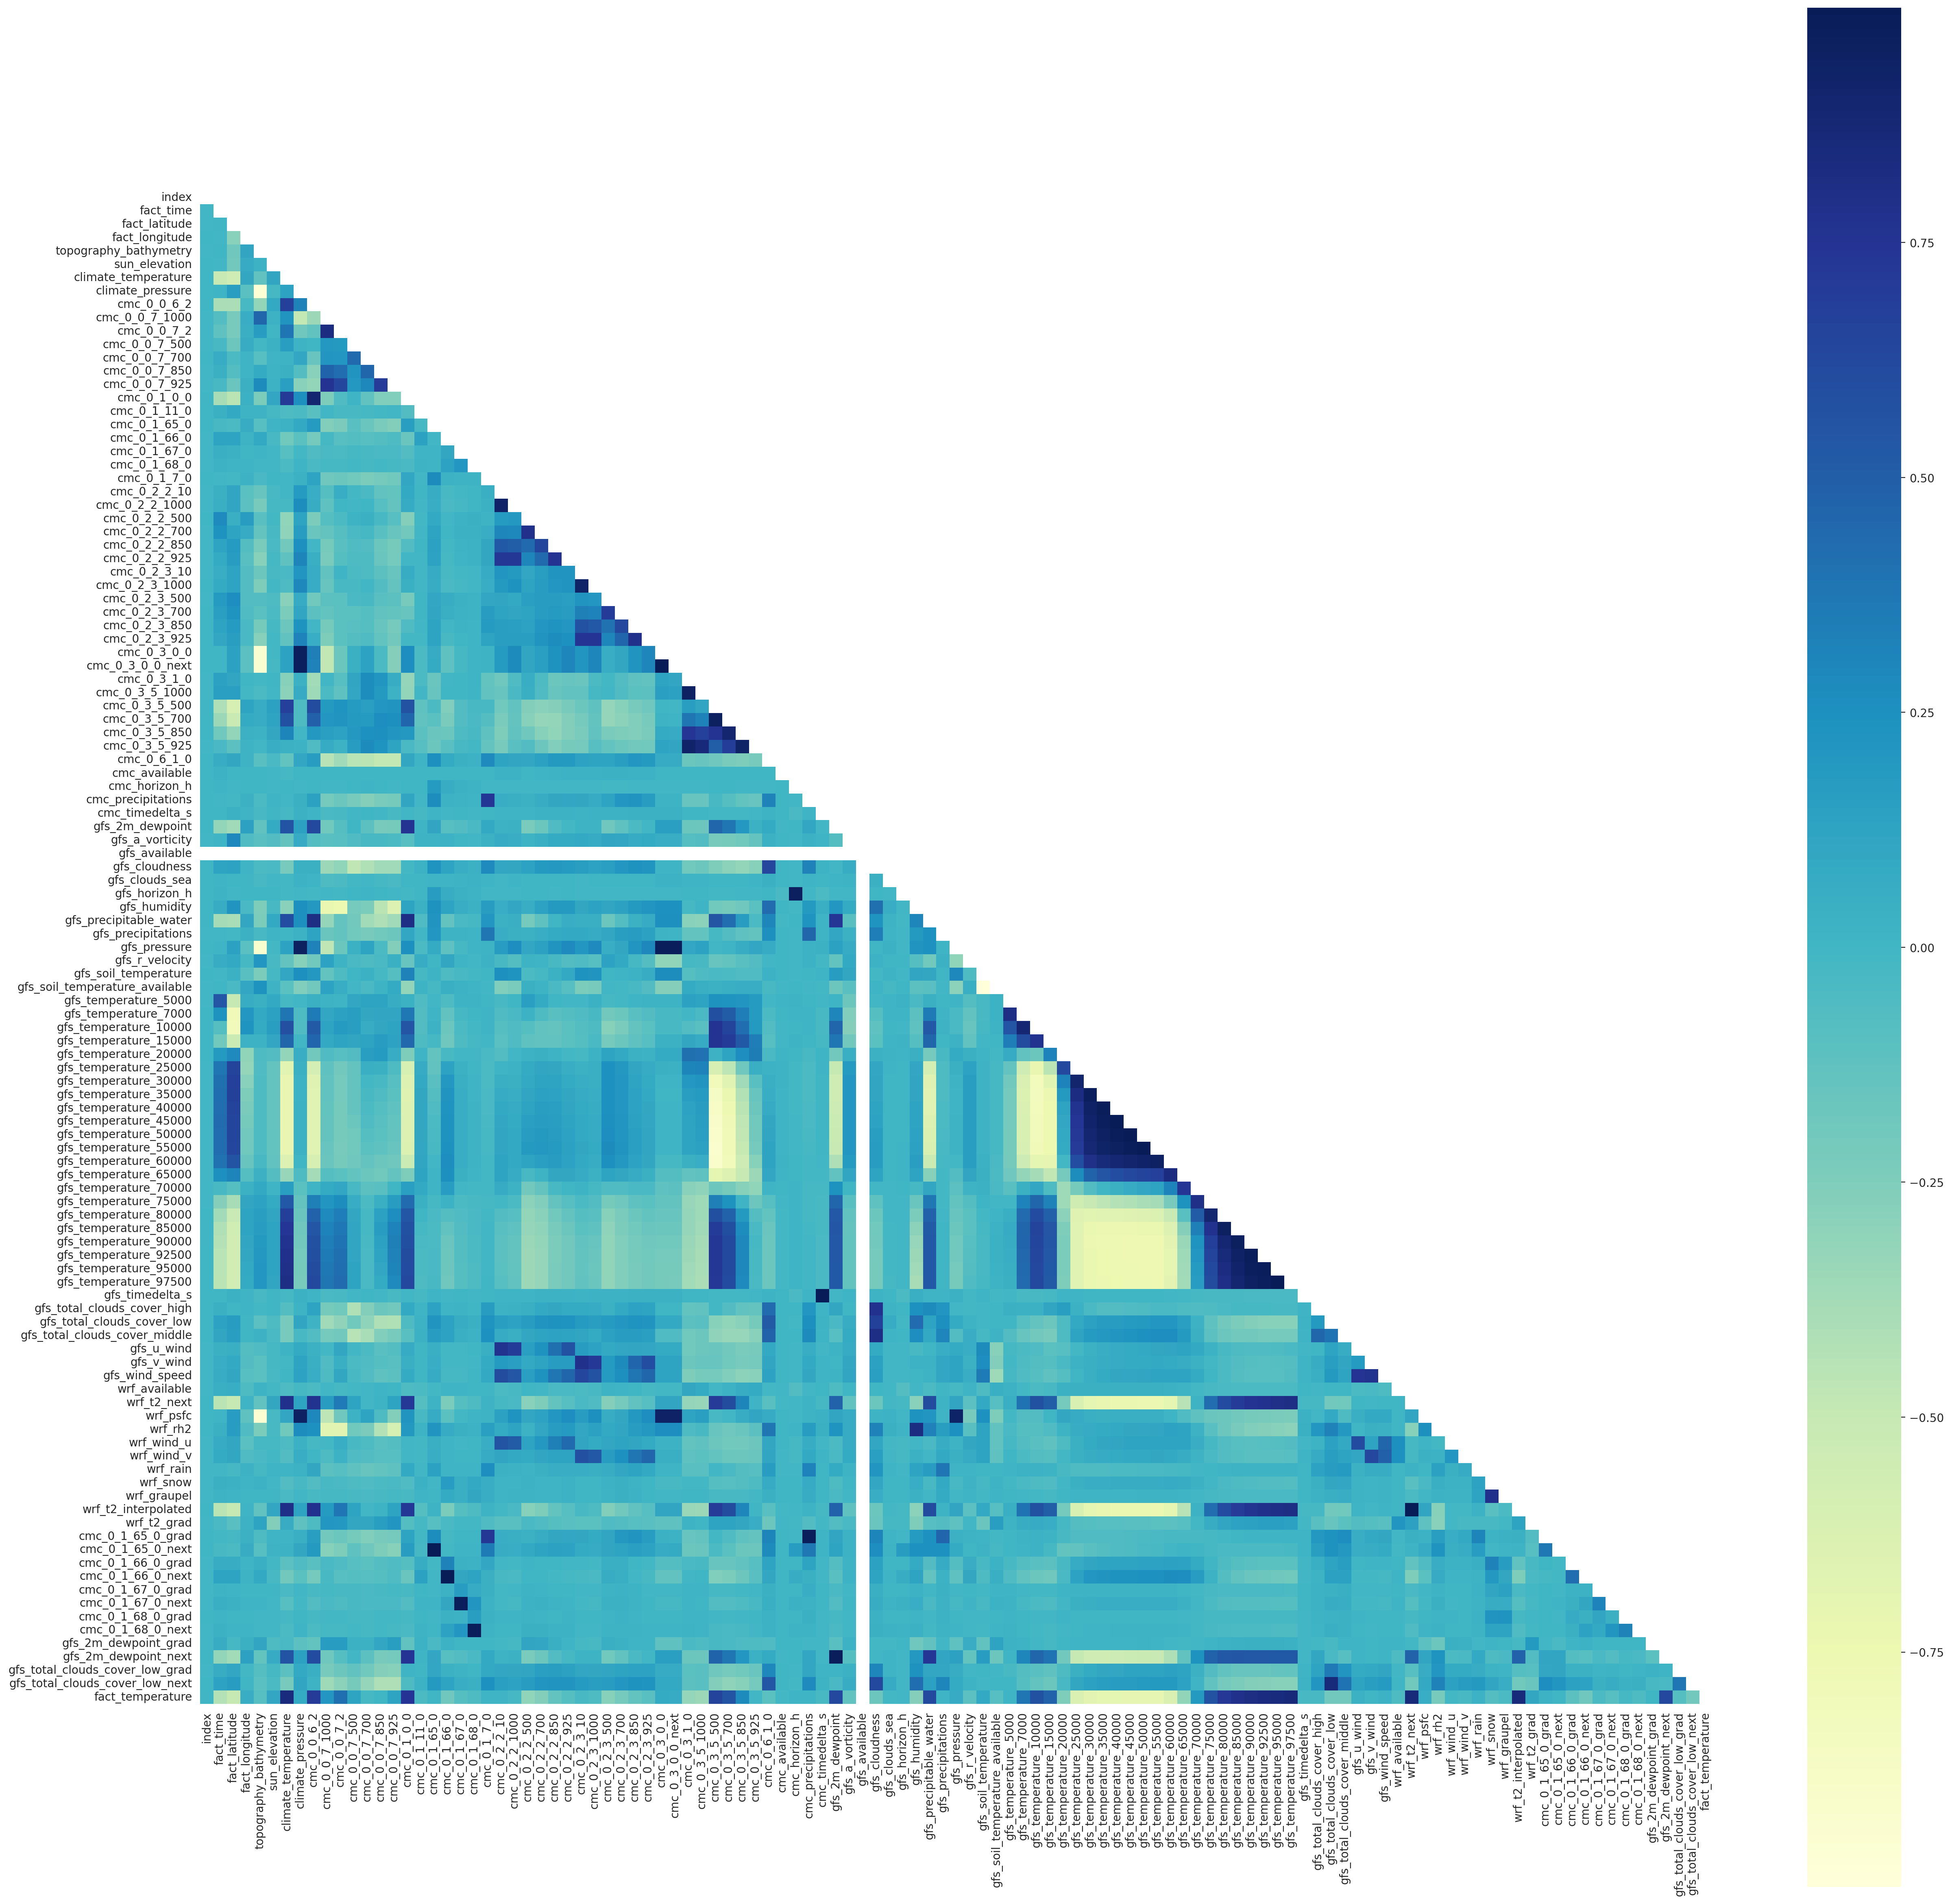

In [ ]:
corrmat = np.abs(df).corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 30))
    ax = sns.heatmap(corrmat, mask=mask, square=True, cmap="YlGnBu")


**UNIVARIATE Selection**


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestfeatures = SelectKBest(score_func=f_regression, k=60)
fit = bestfeatures.fit(df.iloc[:, 1:-1], df.iloc[:, -1])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.columns)
# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(60, 'Score'))


                               Specs         Score
97                       wrf_graupel  1.388636e+07
89                     wrf_available  1.279357e+07
80             gfs_temperature_95000  6.496745e+06
79             gfs_temperature_92500  5.843117e+06
5                      sun_elevation  5.530701e+06
78             gfs_temperature_90000  5.301851e+06
77             gfs_temperature_85000  4.862971e+06
76             gfs_temperature_80000  4.224808e+06
75             gfs_temperature_75000  3.769271e+06
7                   climate_pressure  3.735634e+06
74             gfs_temperature_70000  3.386215e+06
73             gfs_temperature_65000  3.066544e+06
72             gfs_temperature_60000  2.821806e+06
14                     cmc_0_0_7_925  2.731102e+06
71             gfs_temperature_55000  2.651873e+06
70             gfs_temperature_50000  2.540864e+06
69             gfs_temperature_45000  2.483005e+06
68             gfs_temperature_40000  2.440032e+06
67             gfs_temperature_

**Mutual Information betwen features**


We select features with:

- High correlation with fact_tempearature
- High mutual information betwen the features and fact_tempearature]
- Best features from univariate selection


In [ ]:
col_selection = [
    'index',
    'wrf_t2_interpolated',
    'wrf_t2_next',
    'gfs_temperature_97500',
    'gfs_temperature_95000',
    'climate_temperature',
    'gfs_temperature_92500',
    'gfs_temperature_90000',
    'gfs_temperature_85000',
    'gfs_temperature_80000',
    'cmc_0_0_6_2',
    'gfs_temperature_75000',
    'gfs_temperature_70000',
    'gfs_temperature_65000',
    'cmc_0_1_0_0',
    'gfs_temperature_60000',
    'gfs_temperature_55000',
    'gfs_temperature_50000',
    'gfs_temperature_45000',
    'gfs_temperature_40000',
    'gfs_2m_dewpoint_next',
    'gfs_2m_dewpoint',
    'gfs_temperature_35000',
    'gfs_temperature_30000',
    'cmc_0_3_5_500',
    'gfs_precipitable_water',
    'gfs_temperature_25000',
    'cmc_0_3_5_700',
    'gfs_temperature_10000',
    'gfs_temperature_15000',
    'fact_time',
    'gfs_temperature_7000',
    'fact_latitude',
    'cmc_0_0_7_2',
    'cmc_0_3_1_0',
    'sun_elevation',
    'cmc_0_3_5_1000',
    'cmc_0_3_5_850',
    'gfs_humidity',
    'cmc_0_2_2_500',
    'cmc_0_2_2_700',
    'cmc_0_1_66_0_next',
    'cmc_0_1_66_0',
    'gfs_temperature_20000',
    'gfs_a_vorticity',
    'wrf_rh2',
    'gfs_total_clouds_cover_middle',
    'gfs_total_clouds_cover_low',
    'gfs_total_clouds_cover_low_next',
    'cmc_0_2_2_850',
    'cmc_0_0_7_1000',
    'gfs_cloudness',
    'topography_bathymetry',
    'fact_longitude',
    'cmc_0_2_2_925',
    'cmc_0_2_2_10',
    'climate_pressure',
    'gfs_r_velocity',
    'cmc_0_3_0_0',
    'cmc_0_1_66_0_grad',
    'gfs_pressure',
    'fact_temperature'
]


In [ ]:
X = df[col_selection].dropna().iloc[:, 1:-1].values
y = df[col_selection].dropna().iloc[:, -1].values


In [ ]:
Xmean, Xstd, ymean, ystd = X.mean(0), X.std(0), y.mean(), y.std()
Xmin, Xmax, ymin, ymax = X.min(axis=0), X.max(axis=0), y.min(axis=0), y.max(axis=0)
X = (X - Xmean) / Xstd
y = (y - ymean) / ystd


# Model Selection



In [ ]:
from sklearn.model_selection import train_test_split
Xtr, Xval, ytr, yval = train_test_split(X, y, random_state=1, test_size=10000)


In [ ]:
def compute_rmse(y, ypred, ystd=1.):
    return np.mean((y - ypred)**2)**0.5 * ystd


Find Best alpha for Lasso model


In [ ]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
lasso_modelCV = LassoCV(cv=10, random_state=0, max_iter=10000)

# Fit model
lasso_modelCV.fit(Xtr, ytr)

alpha = lasso_modelCV.alpha_
print(alpha)


0.0009351768927884466


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=alpha)
lasso_model.fit(Xtr, ytr)
ypred_tr = lasso_model.predict(Xtr)
ypred_val = lasso_model.predict(Xval)

print(f'Train RMSE: {compute_rmse(ytr, ypred_tr, ystd):.3f}')
print(f'Valid RMSE: {compute_rmse(yval, ypred_val, ystd):.3f}')


Train RMSE: 2.419
Valid RMSE: 2.441


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Build decision tree
decison_tree_model = DecisionTreeRegressor(max_depth=10, random_state=0)
decison_tree_model.fit(Xtr, ytr)

ypred_tr = decison_tree_model.predict(Xtr)
ypred_val = decison_tree_model.predict(Xval)

print(f'Train RMSE: {compute_rmse(ytr, ypred_tr, ystd):.3f}')
print(f'Valid RMSE: {compute_rmse(yval, ypred_val, ystd):.3f}')


Train RMSE: 2.448
Valid RMSE: 2.499


In [ ]:
from xgboost import XGBRegressor

xgboost_model = XGBRegressor(max_depth=5, subsample=0.8, colsample_bytree=0.8)
xgboost_model.fit(Xtr, ytr)

ypred_tr = xgboost_model.predict(Xtr)
ypred_val = xgboost_model.predict(Xval)

print(f'Train RMSE: {compute_rmse(ytr, ypred_tr, ystd):.3f}')
print(f'Valid RMSE: {compute_rmse(yval, ypred_val, ystd):.3f}')


Train RMSE: 2.083
Valid RMSE: 2.135


In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators = 50, random_state = 50, bootstrap= True,
                                            max_depth= 80, max_features= 'auto',min_samples_leaf= 4,
                                            min_samples_split=10)

random_forest_model.fit(Xtr, ytr)

ypred_tr = random_forest_model.predict(Xtr)
ypred_val = random_forest_model.predict(Xval)

print(f'Train RMSE: {compute_rmse(ytr, ypred_tr, ystd):.3f}')
print(f'Valid RMSE: {compute_rmse(yval, ypred_val, ystd):.3f}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Train RMSE: 1.095
Valid RMSE: 1.980


# Parameter Optimisation




In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [ ]:
import numpy as np


def get_cv_idx(n, test_size=0.2, n_splits=2):
    train_idx, test_idx = [], []
    for _ in range(n_splits):
        idx = np.random.permutation(n)
        train_size = int(n * (1 - test_size)
                         ) if isinstance(test_size, float) else n - test_size
        tr ain_idx.append(idx[:train_size])
        test_idx.append(idx[train_size:])
    return train_idx, test_idx


In [ ]:
train_idx, cv_idx = get_cv_idx(len(Xtr), test_size=10000, n_splits=10)


# Model Evaluation



In [ ]:
df_test = pd.read_csv(
    '/content/drive/MyDrive/dataset/public/test_feat.csv', low_memory=True)


In [ ]:
col_selection = [
    'index',
    'wrf_t2_interpolated',
    'wrf_t2_next',
    'gfs_temperature_97500',
    'gfs_temperature_95000',
    'climate_temperature',
    'gfs_temperature_92500',
    'gfs_temperature_90000',
    'gfs_temperature_85000',
    'gfs_temperature_80000',
    'cmc_0_0_6_2',
    'gfs_temperature_75000',
    'gfs_temperature_70000',
    'gfs_temperature_65000',
    'cmc_0_1_0_0',
    'gfs_temperature_60000',
    'gfs_temperature_55000',
    'gfs_temperature_50000',
    'gfs_temperature_45000',
    'gfs_temperature_40000',
    'gfs_2m_dewpoint_next',
    'gfs_2m_dewpoint',
    'gfs_temperature_35000',
    'gfs_temperature_30000',
    'cmc_0_3_5_500',
    'gfs_precipitable_water',
    'gfs_temperature_25000',
    'cmc_0_3_5_700',
    'gfs_temperature_10000',
    'gfs_temperature_15000',
    'fact_time',
    'gfs_temperature_7000',
    'fact_latitude',
    'cmc_0_0_7_2',
    'cmc_0_3_1_0',
    'sun_elevation',
    'cmc_0_3_5_1000',
    'cmc_0_3_5_850',
    'gfs_humidity',
    'cmc_0_2_2_500',
    'cmc_0_2_2_700',
    'cmc_0_1_66_0_next',
    'cmc_0_1_66_0',
    'gfs_temperature_20000',
    'gfs_a_vorticity',
    'wrf_rh2',
    'gfs_total_clouds_cover_middle',
    'gfs_total_clouds_cover_low',
    'gfs_total_clouds_cover_low_next',
    'cmc_0_2_2_850',
    'cmc_0_0_7_1000',
    'gfs_cloudness',
    'topography_bathymetry',
    'fact_longitude',
    'cmc_0_2_2_925',
    'cmc_0_2_2_10',
    'climate_pressure',
    'gfs_r_velocity',
    'cmc_0_3_0_0',
    'cmc_0_1_66_0_grad',
    'gfs_pressure'
]


Xte = df_test[col_selection].iloc[:, 1:].values
Xte = (Xte - Xmean) / Xstd


First we re train our best model using the whole dataset, with no spliting for validation (more data theorical mean better performance)


In [ ]:
random_forest_model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=80, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=50, random_state=50)

In [ ]:
# Remember to un-standardize the predictions
ypred_te = random_forest_model.predict(Xte) * ystd + ymean


# Submission



In [ ]:
submission_df = pd.DataFrame(data={'index': df_test['index'].values,
                                   'fact_temperature': ypred_te.squeeze()})


submission_df.to_csv("/content/drive/MyDrive/dataset/public/submission.csv", index=False)


In [ ]:
# Check the submission file
! head - 6 "/content/drive/MyDrive/dataset/public/submission.csv"
